In [1]:
!unzip -q "/content/archive (4).zip" -d /content/food_dataset
!ls /content/food_dataset


data


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 100
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train = datagen.flow_from_directory(
    "/content/food_dataset",
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val = datagen.flow_from_directory(
    "/content/food_dataset",
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 1600 images belonging to 1 classes.
Found 400 images belonging to 1 classes.


In [3]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_size,img_size,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(train.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train, epochs=10, validation_data=val)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 31s 571ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 28s 556ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 28s 555ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 28s 551ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 41s 557ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 28s 553ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 28s 557ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 29s 569ms/step

Saving burger.jpg to burger (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step

🍽️ Food: data
🔥 Estimated Calories: 150 kcal


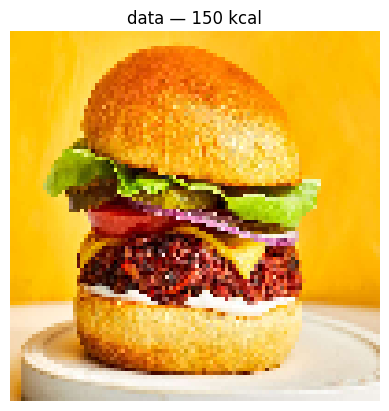

In [7]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

uploaded = files.upload()
img_path = list(uploaded.keys())[0]

img = image.load_img(img_path, target_size=(img_size, img_size))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)
class_idx = np.argmax(pred)
class_labels = list(train.class_indices.keys())
predicted_class = class_labels[class_idx]

# Example calorie map (update with actual values if needed)
calorie_map = {
    cls: 150 + i*50 for i, cls in enumerate(class_labels)
}
estimated_kcal = calorie_map.get(predicted_class, "Unknown")

print(f"\n🍽️ Food: {predicted_class}")
print(f"🔥 Estimated Calories: {estimated_kcal} kcal")

plt.imshow(img)
plt.axis('off')
plt.title(f"{predicted_class} — {estimated_kcal} kcal")
plt.show()
